In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/reddit-sentiment-analysis-data/reddit.csv')

In [3]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


### Removing null values 

In [6]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [8]:
df.dropna(inplace=True)

### Removing duplicated  values

In [9]:
df.duplicated().sum()

350

In [10]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [11]:
df.drop_duplicates(inplace=True)

### Cleaning values with empty or new line strings

In [12]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [13]:
df = df[~(df['clean_comment'].str.strip() == '')]

### Converting all text to lowercase

In [14]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### Removing whitespaces from start and end of text

In [15]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(" "))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [16]:
df['clean_comment'] = df['clean_comment'].str.strip()
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(" "))].sum()

clean_comment    0
category         0
dtype: object

### Identifying comments with URLs

In [17]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(||),]|(?:%[0-9a-fA-f][0-9a-fA-F]))+'
com_with_url = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

com_with_url.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/strings/accessor.py:1327: FutureWarning: Possible set union at position 45
  if regex and re.compile(pat).groups:


,clean_comment,category


### Removing comments containing new line characters

In [18]:
cnl = df[df['clean_comment'].str.contains('\n')]

cnl.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [19]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ',regex=True)

cnln = df[df['clean_comment'].str.contains('\n')]
cnln

,clean_comment,category


## Exploratory Data Analysis

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

### Class Distribution

<Axes: xlabel='category', ylabel='count'>

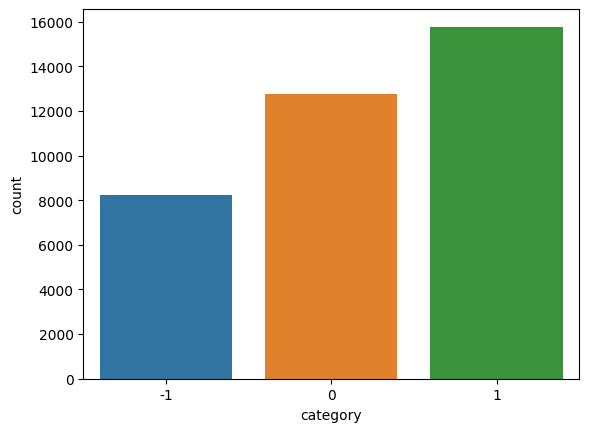

In [21]:
sns.countplot(data=df,x='category')

### Frequency distribution of sentiments

In [22]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

### Word Count

In [23]:
df['word_count'] =df['clean_comment'].apply(lambda x: len(x.split()))

In [24]:
df.sample(5)

,clean_comment,category,word_count
20273,just saw sky sports setting their camera here ...,1,20
9544,who will let drop deuce their place loads,0,8
14022,should come and lurker the corner again,0,7
23611,yes yes was waiting for this soon the 2019 ele...,-1,38
8846,when nda was power was doing schooling abroad ...,-1,92


In [25]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


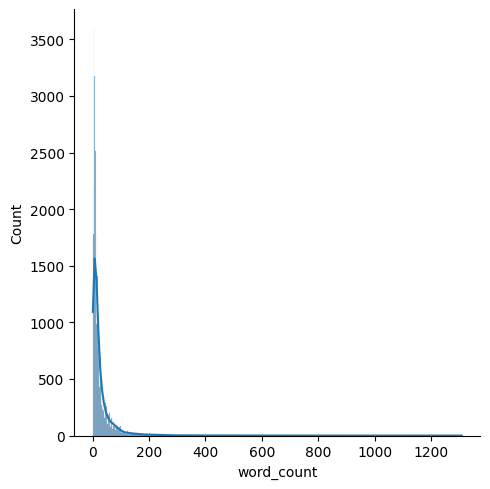

In [26]:
sns.displot(df['word_count'], kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

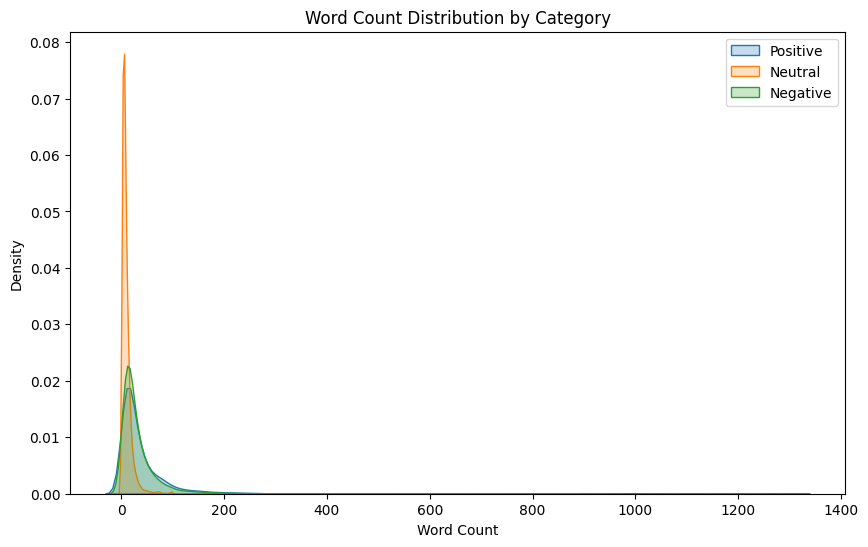

In [27]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['word_count'],label ='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'],label ='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'],label ='Negative', fill=True)

plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()
plt.plot()

<Axes: >

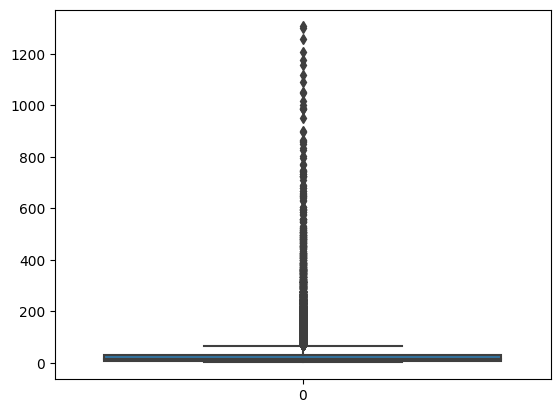

In [28]:
sns.boxplot(df['word_count'])

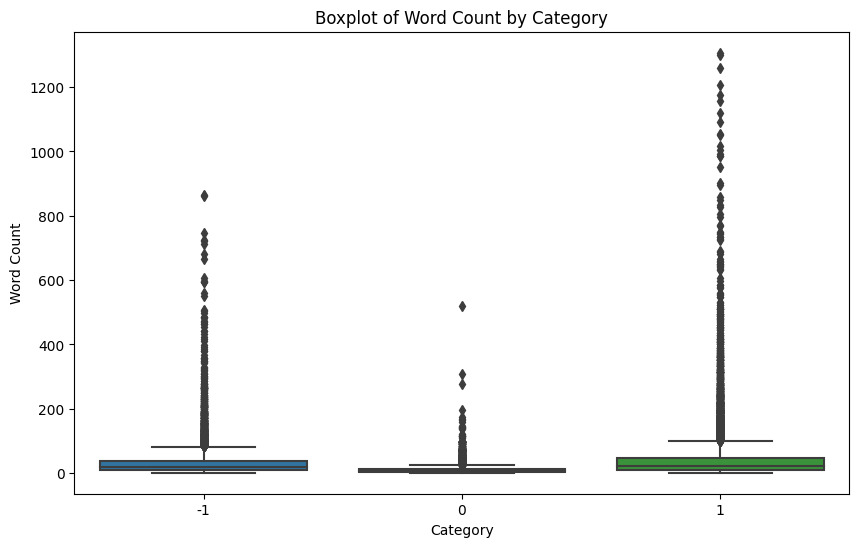

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category',y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

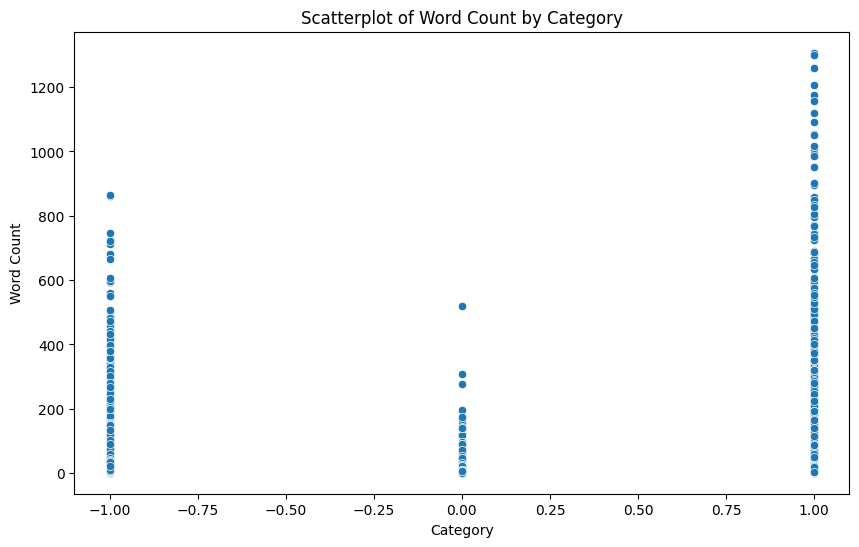

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='category',y='word_count')
plt.title('Scatterplot of Word Count by Category')
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

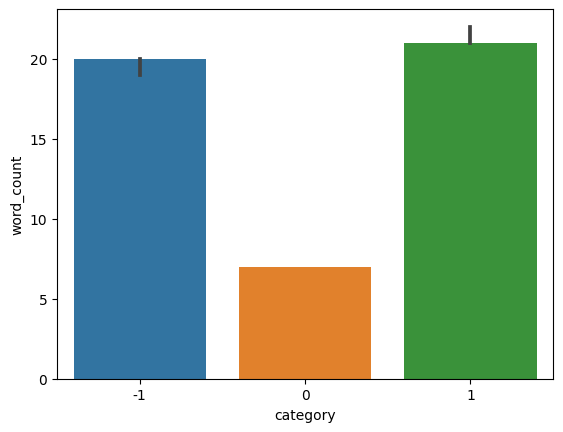

In [31]:
sns.barplot(df, x='category', y='word_count',estimator='median')

### Identifying stop words

In [32]:
!pip install nltk

In [33]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
2773,hope supreme court provides due justice,-1,6,0
1156,had also not allowed aap give aap tshirt would...,0,11,2
1071,you mean say vote for aap pass bill assuming v...,1,117,37
11009,white class all because she lumped into this e...,0,78,40
26652,according him the people who feel unsafe for r...,0,18,6


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


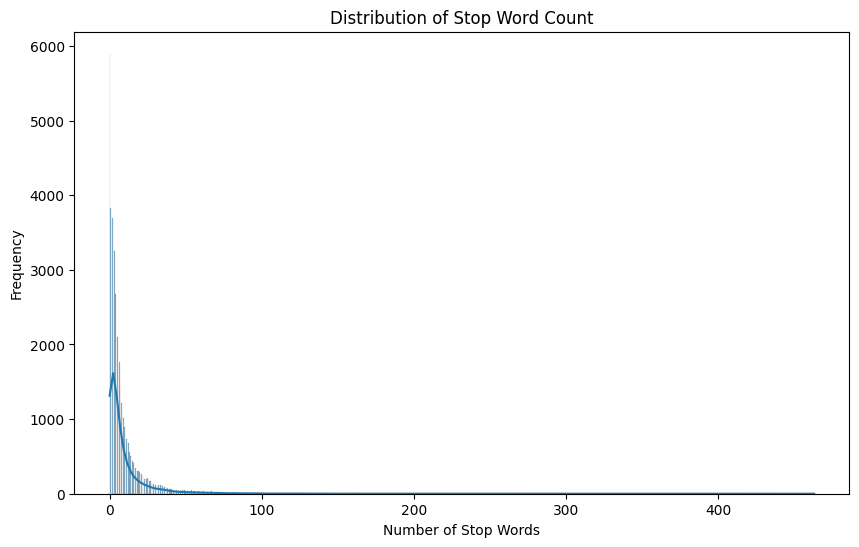

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title("Distribution of Stop Word Count")
plt.xlabel("Number of Stop Words")
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


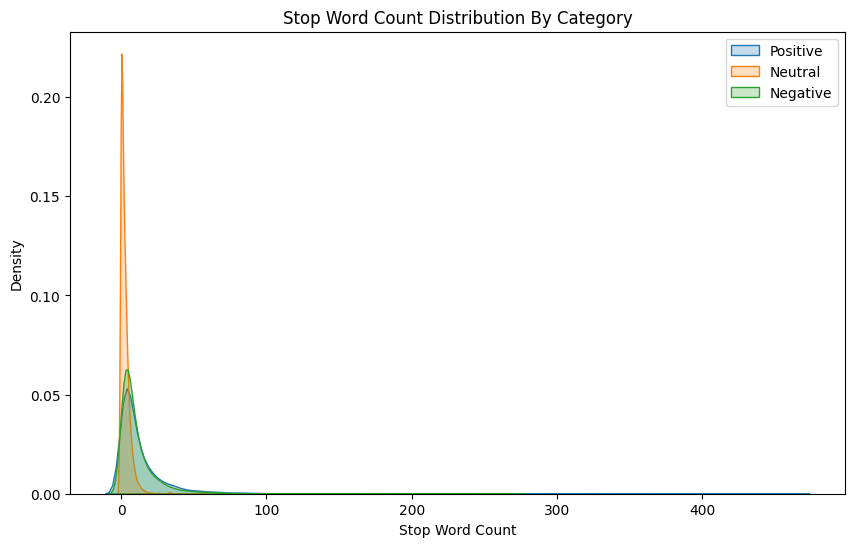

In [36]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

plt.title('Stop Word Count Distribution By Category')
plt.xlabel('Stop Word Count')
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

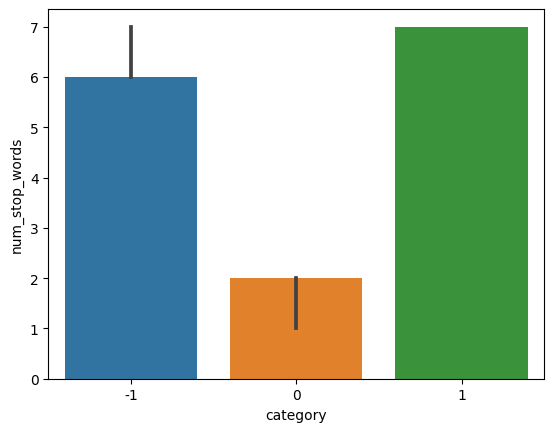

In [37]:
sns.barplot(df,x='category',y='num_stop_words', estimator='median')

## Finding most used stop words

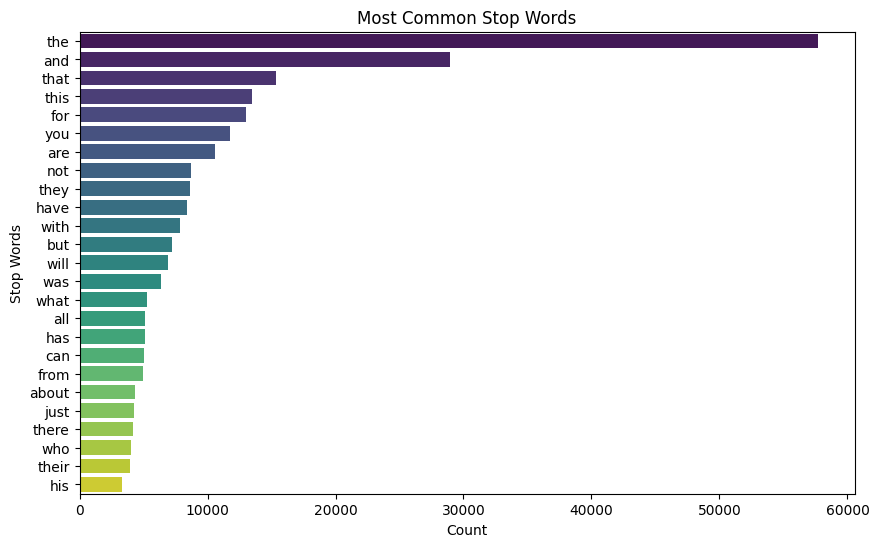

In [38]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

most_common_words = Counter(all_stop_words).most_common(25)

top_25_df = pd.DataFrame(most_common_words, columns=['stop_words','count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_df, x='count', y='stop_words', palette='viridis')
plt.title('Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Words')
plt.show()

### Finding number of characters

In [39]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [40]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

## Finding special characters

In [43]:
all_text = ' '.join(df['clean_comment'])
char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [44]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '呗', 'ഥ', '杨'], dtype=object)

In [45]:
char_frequency_df.tail(50)

,character,frequency
1336,回,1
1337,毫,1
1322,足,1
1323,够,1
1324,假,1
1325,才,1
1326,叫,1
1327,醒,1
1328,妖,1
1329,婆,1


### Finding Punctuation Characters

In [46]:
df['num_punct'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-"'])
)
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punct
26958,wouldn that give him the powers all the grecia...,-1,14,8,84,0
27134,they have their legacies stake let see lion wi...,1,10,3,55,0
11813,modi based really hope trump makes official vi...,1,9,0,55,0
395,remember dad taking one such rally speaker was...,1,157,57,923,0
1705,arre yaar contribute nahin kiya,0,5,0,31,0


In [47]:
df['num_punct'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punct, dtype: float64

### N-gram distribution

### Bi-grams

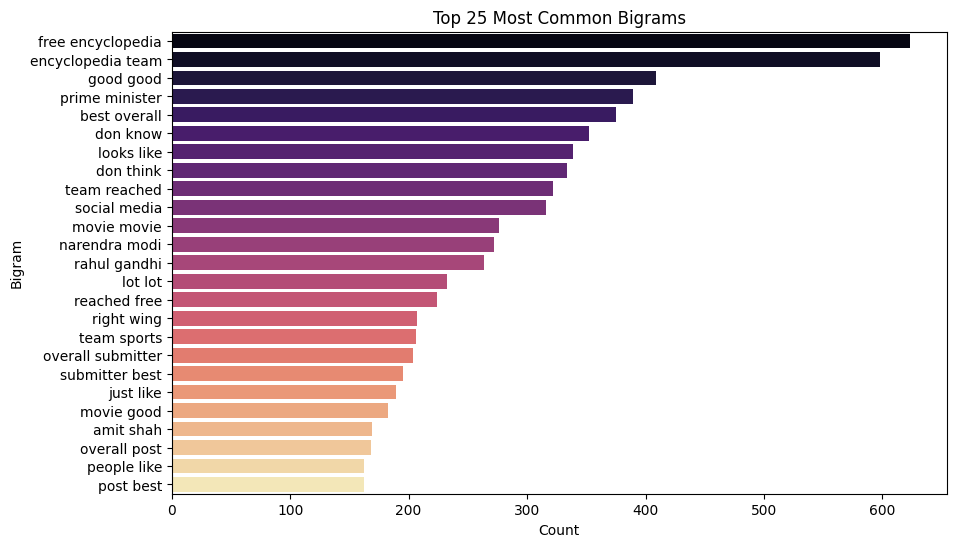

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse = True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram','count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

### Tri-grams

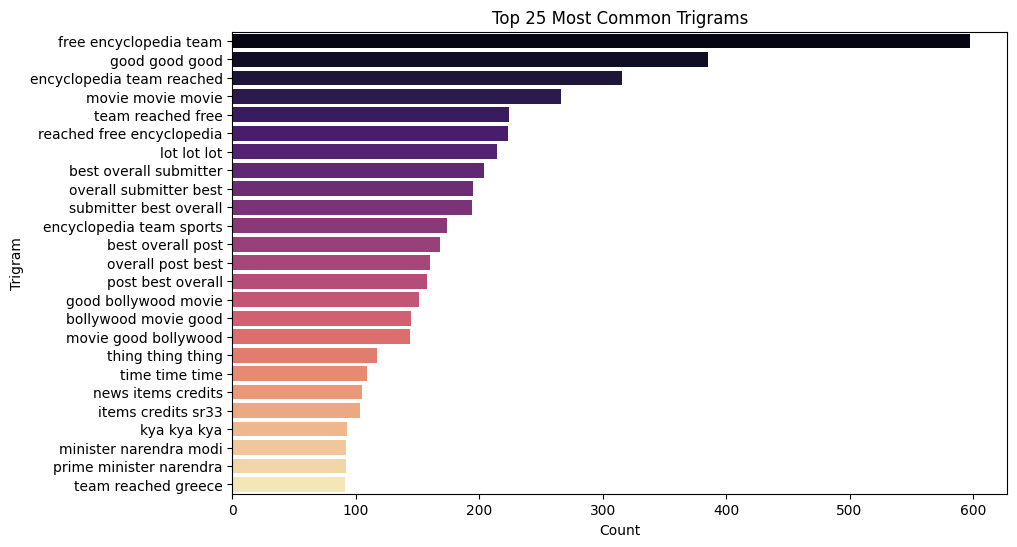

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse = True)
    return words_freq[:n]

top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram','count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='magma')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

### Remove all non-English characters

In [50]:
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [51]:

all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df
     

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


### Removing unwanted stop words

In [52]:
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

### Lemmatization

In [53]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()


df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punct
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


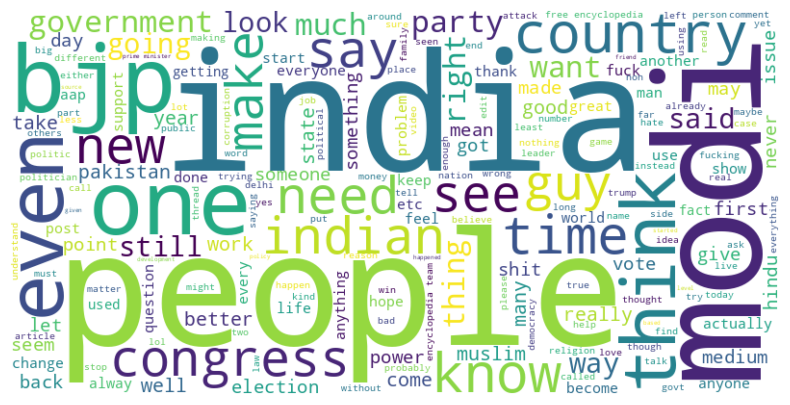

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])     

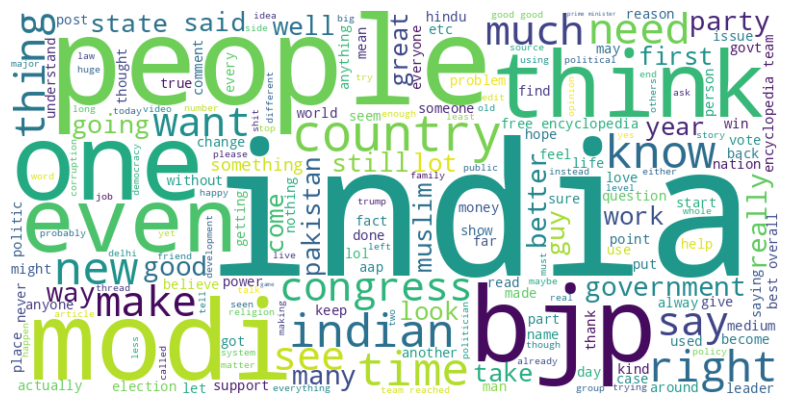

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])
     

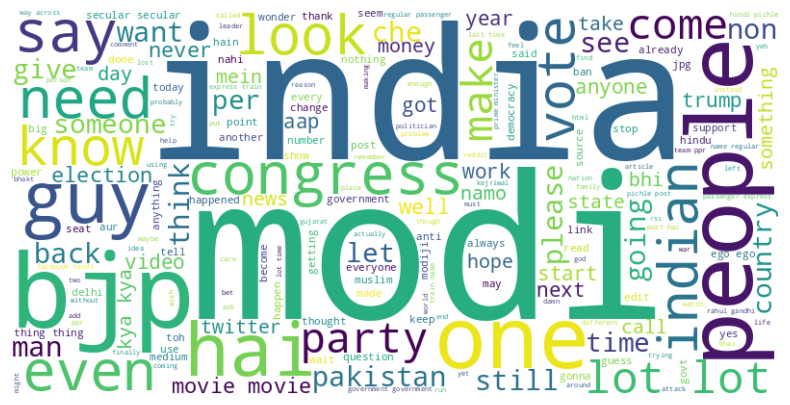

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])
     

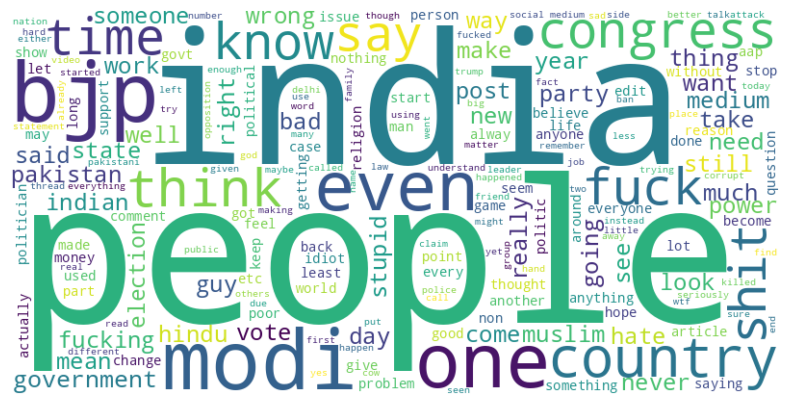

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])
     

### Top n Words

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


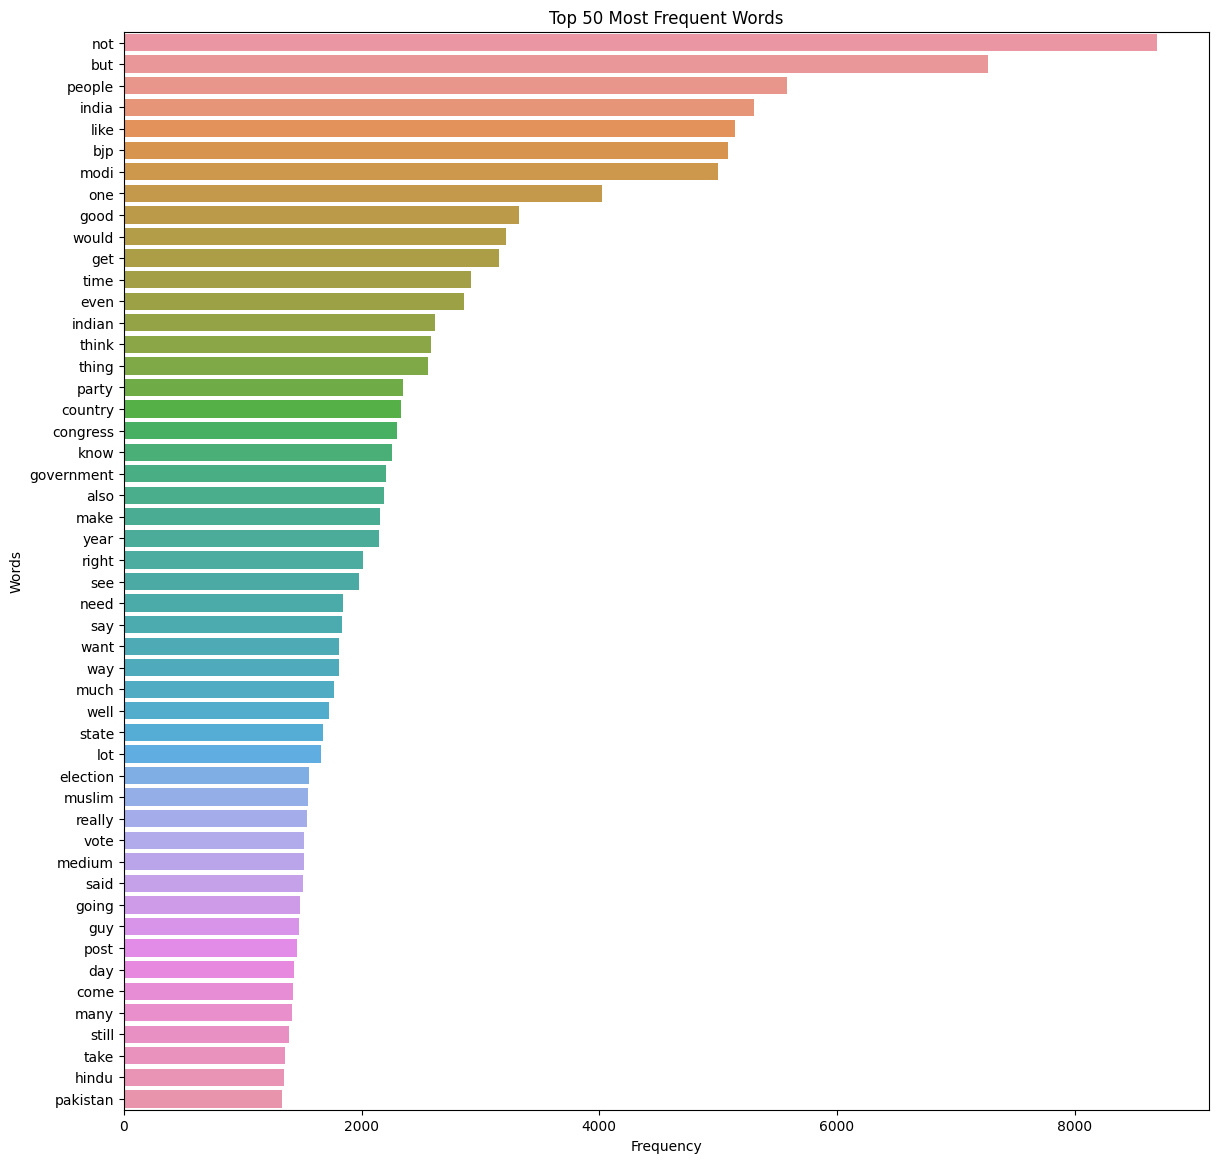

In [61]:
def plot_top_n_words(df, n=20):

    words = ' '.join(df['clean_comment']).split()

    counter = Counter(words)
    most_common_words = counter.most_common(n)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(14, 14))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_n_words(df, n=50)

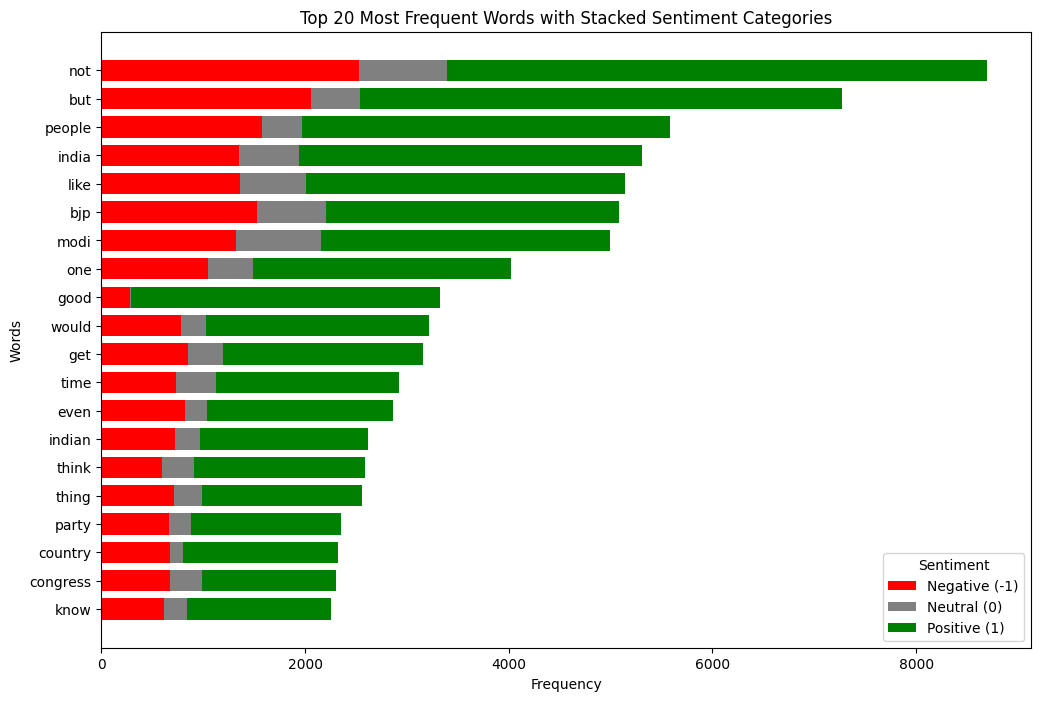

In [62]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  

            word_category_counts[word][category] += 1

    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]


    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_n_words_by_category(df, n=20)

In [63]:
df

,clean_comment,category,word_count,num_stop_words,num_chars,num_punct
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0
...,...,...,...,...,...,...
37244,jesus,0,1,0,5,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0,99,0
37246,downvote karna tha par upvote hogaya,0,6,0,36,0
37247,haha nice,1,2,0,9,0


In [64]:
final_df = df.drop(columns=['word_count', 'num_stop_words', 'num_chars', 'num_punct'])

In [65]:
final_df

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [67]:
final_df.to_csv('cleaned_data.csv', index=False)